In [58]:
## imports

import numpy as np
import numpy.ma as ma
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

### palette
import matplotlib.cm as mplcm
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic



In [59]:
import matplotlib
print(matplotlib.__version__)

2.0.2


In [60]:
## Dataset

dir="/Users/auraoupa/Data/GLORYS12V1/2017/"


In [61]:
def plot_atl(fig,sub,var,lon,lat,vmin,vmax,unit,name,pal):
        ax = fig.add_subplot(sub,projection=ccrs.PlateCarree(central_longitude=-30))
        cmap = plt.get_cmap(pal)
        ax.set_extent([-85, 15, 25, 60])
        cmap.set_under(color='grey')
        pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax,alpha=1)
        ax.add_feature(cfeature.LAND)
        ax.coastlines()
        gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

        fig.subplots_adjust(right=0.8)
        gl.xlocator = mticker.FixedLocator([-110,-90,-70,-50,-30,-10,10,30,50,70,90,110])
        gl.ylocator = mticker.FixedLocator([-10,0,10,20,30,40,50,60,70,80])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 15, 'color': 'gray'}
        gl.ylabel_style = {'size': 15, 'color': 'gray'}
        gl.xlabels_top = False
        gl.ylabels_left = False

        cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75,label=unit)
        ax.set_title(name,size=17,y=1.08)


In [62]:
def plot_var(month):
    mm=str(month).zfill(2)
    file_var=dir+'/fine_scale_vorticity_variance_boxaverage_natl_y2017m'+str(mm)+'.nc'
    ds=xr.open_dataset(file_var)
    latcrsm=ds['latcrsm']
    loncrsm=ds['loncrsm']
    var=ds['vort_var_boxcar']
    mask=var<100
    mask_one=mask.astype(int)
    var_ma=np.ma.masked_where(1-mask_one,var)

    fig = plt.figure(figsize=(20,10))
    plot_atl(fig,111,var_ma,loncrsm, latcrsm,0,0.1,'','GLORYS12V1 Small scales relative vorticity variance in y2017m'+str(mm),seq_cmap)
    plt.savefig('plots/GLORYS12V1_plots_small_scale_vorticity_variance_y2017m'+str(mm)+'.png', dpi=300, bbox_inches='tight')

In [43]:
month=1
mm=str(month).zfill(2)
file_var=dir+'/fine_scale_vorticity_variance_boxaverage_y2017m'+str(mm)+'.nc'
ds=xr.open_dataset(file_var)
latcrsm=ds['latcrsm']
loncrsm=ds['loncrsm']
var=ds['vort_var_boxcar']
mask=var>100
mask_one=mask.astype(int)
var_ma=np.ma.masked_where(1-mask_one,var)


In [30]:
ds

<xarray.Dataset>
Dimensions:          (xcrsm: 254, ycrsm: 360)
Dimensions without coordinates: xcrsm, ycrsm
Data variables:
    vort_var_boxcar  (xcrsm, ycrsm) float32 nan nan nan nan nan nan nan nan ...
    latcrsm          (xcrsm, ycrsm) float32 ...
    loncrsm          (xcrsm, ycrsm) float32 ...

In [27]:
print(loncrsm[220:230,150:160])

<xarray.DataArray 'loncrsm' (xcrsm: 10, ycrsm: 10)>
array([[-127.210602, -126.472847, -125.74276 , -125.019829, -124.303658,
        -123.59375 , -122.889511, -122.190605, -121.496513, -120.806847],
       [-126.761787, -126.037964, -125.32206 , -124.613487, -123.911758,
        -123.2164  , -122.526886, -121.842857, -121.163712, -120.489082],
       [-126.297935, -125.588638, -124.887413, -124.193672, -123.506874,
        -122.826622, -122.152328, -121.483574, -120.819862, -120.160751],
       [-125.818932, -125.124702, -124.438683, -123.760269, -123.088974,
        -122.424301, -121.765732, -121.112724, -120.464951, -119.821747],
       [-125.324844, -124.64621 , -123.975937, -123.313408, -122.658112,
        -122.009453, -121.367035, -120.730377, -120.098846, -119.472137],
       [-124.81562 , -124.153198, -123.499161, -122.852997, -122.214142,
        -121.582115, -120.956314, -120.336342, -119.721642, -119.111786],
       [-124.291397, -123.645752, -123.008507, -122.379219, -121.7

In [31]:
val=np.where(var<10)

In [37]:
val[1][0]


91

In [47]:
var_ma[0,92]

0.009315487

In [46]:
mask_one[0,92]

<xarray.DataArray 'vort_var_boxcar' ()>
array(1)

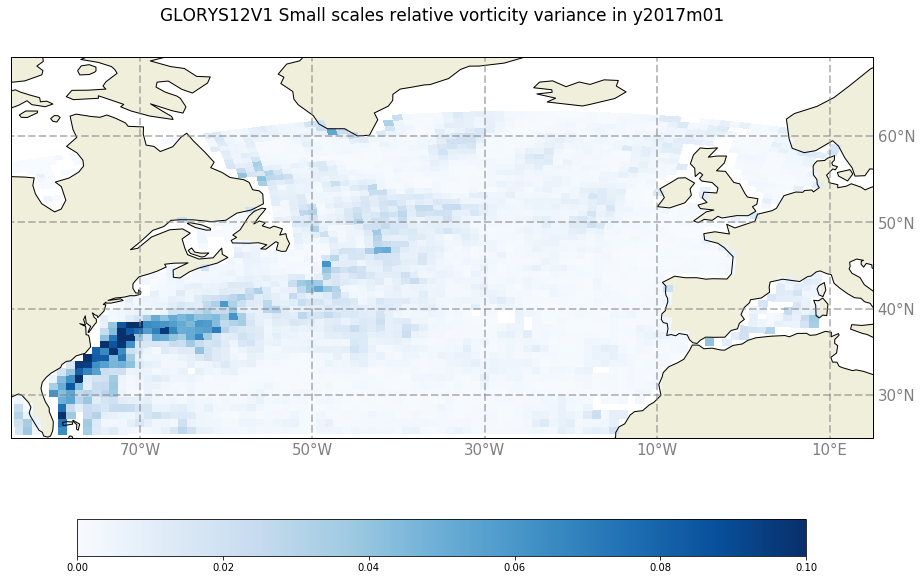

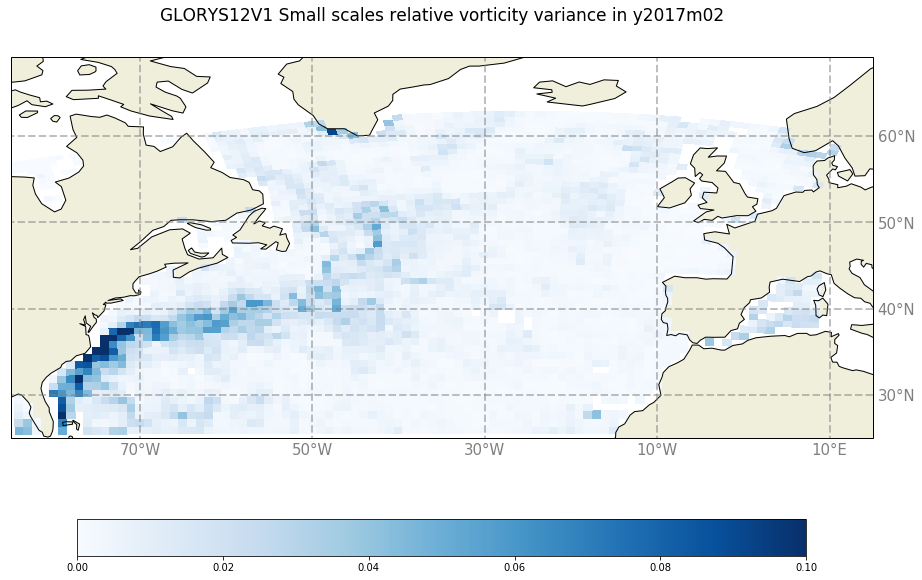

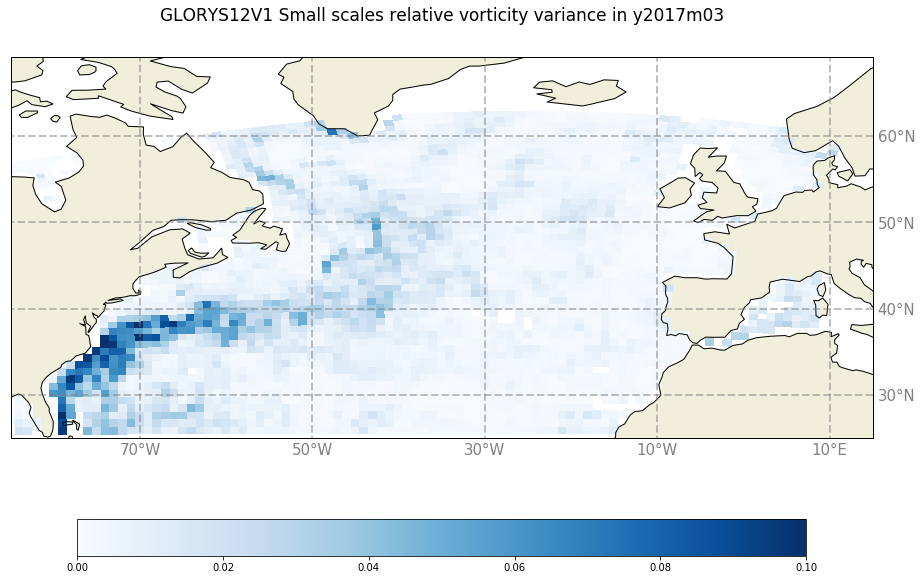

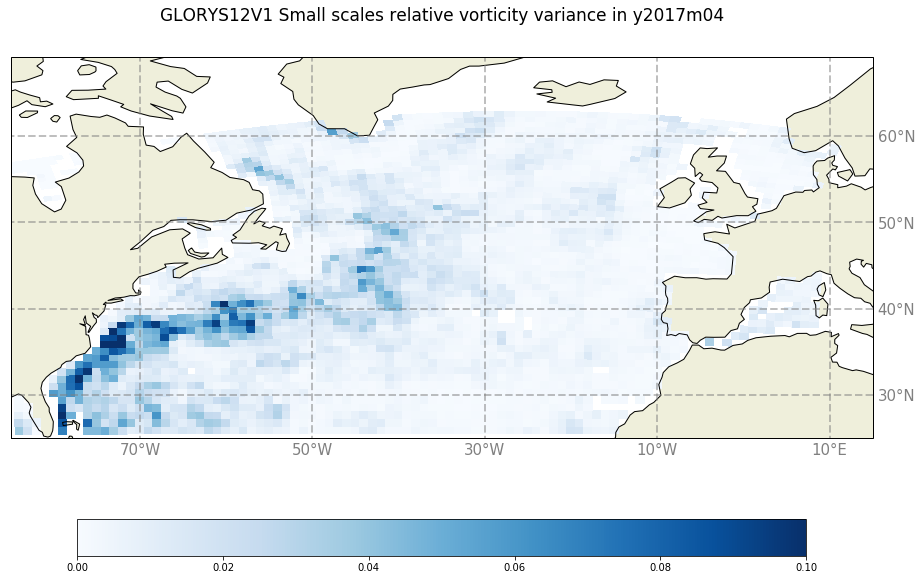

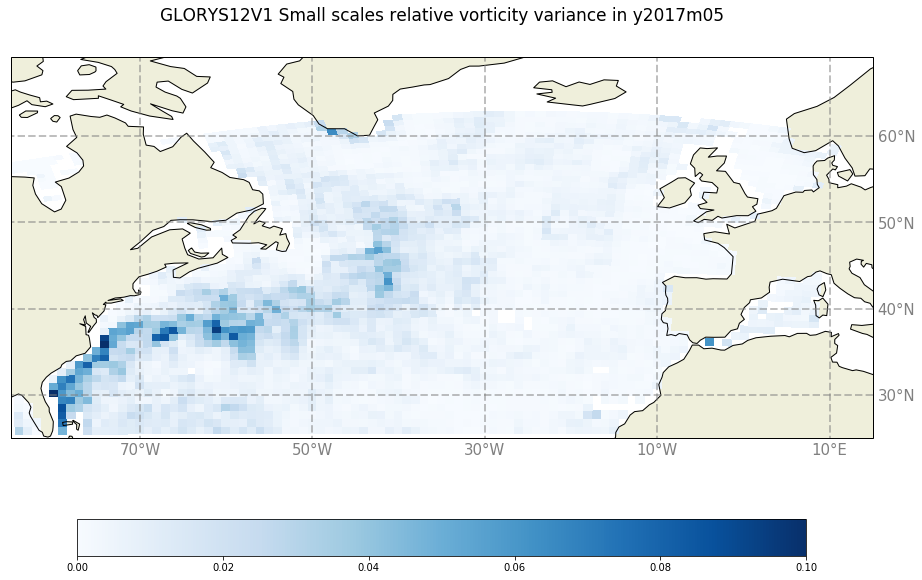

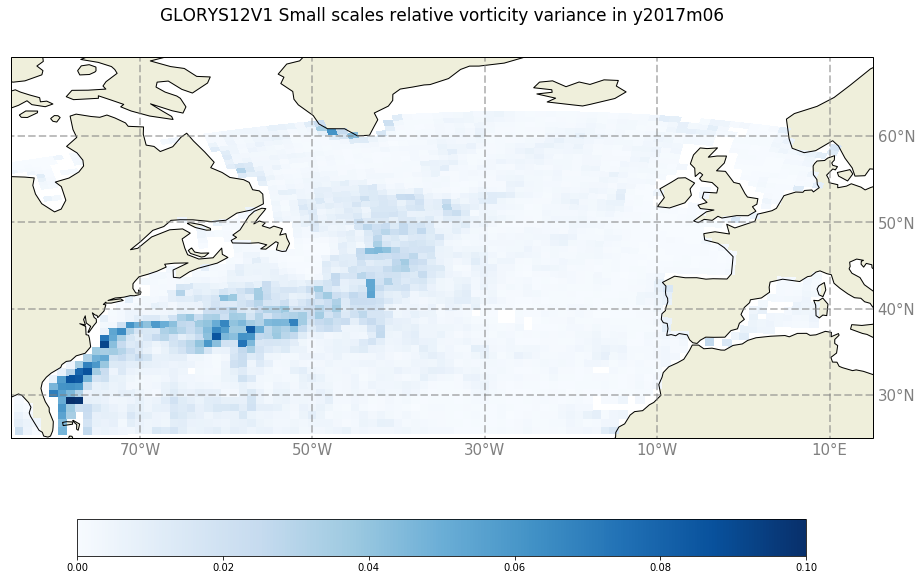

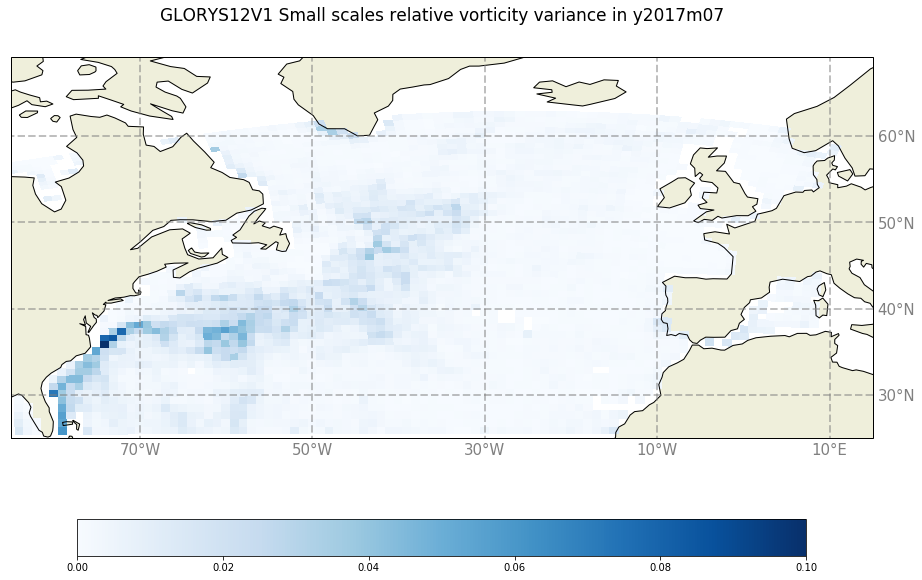

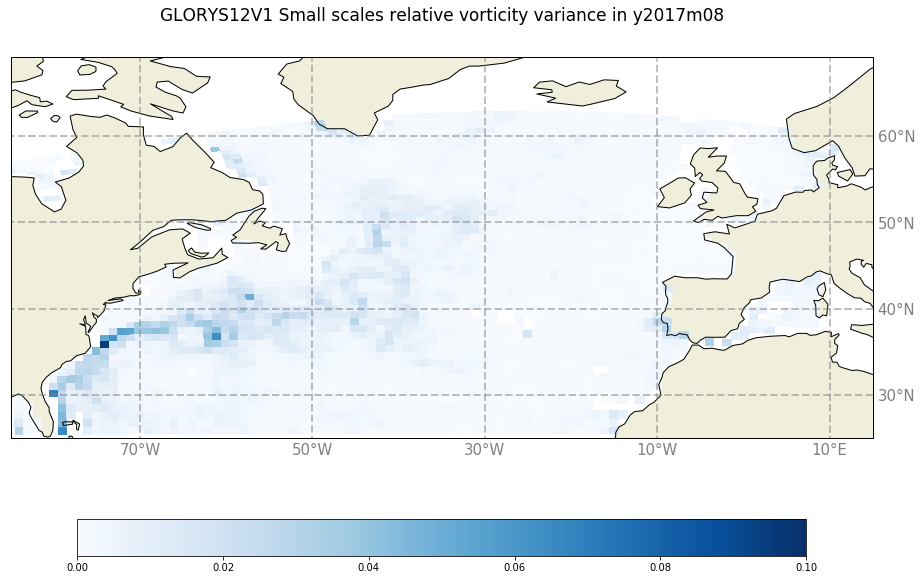

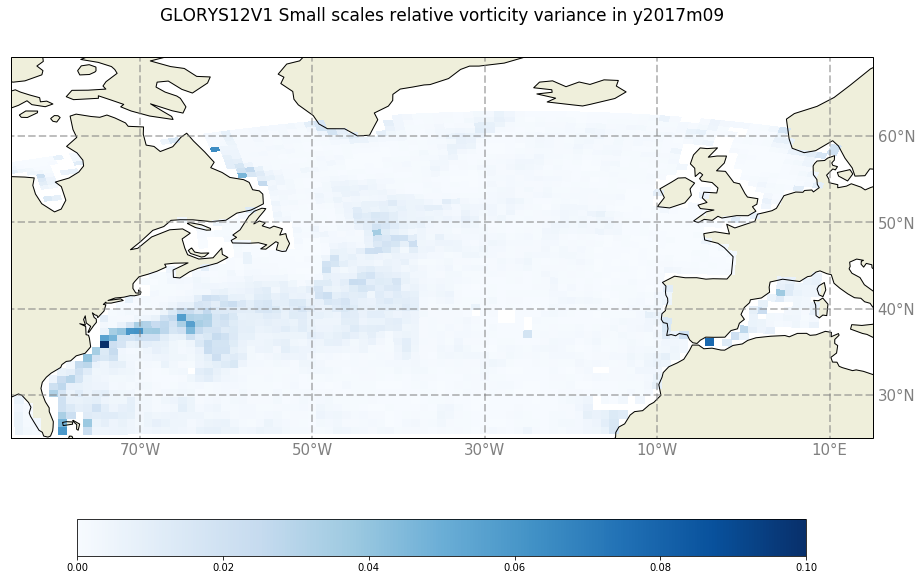

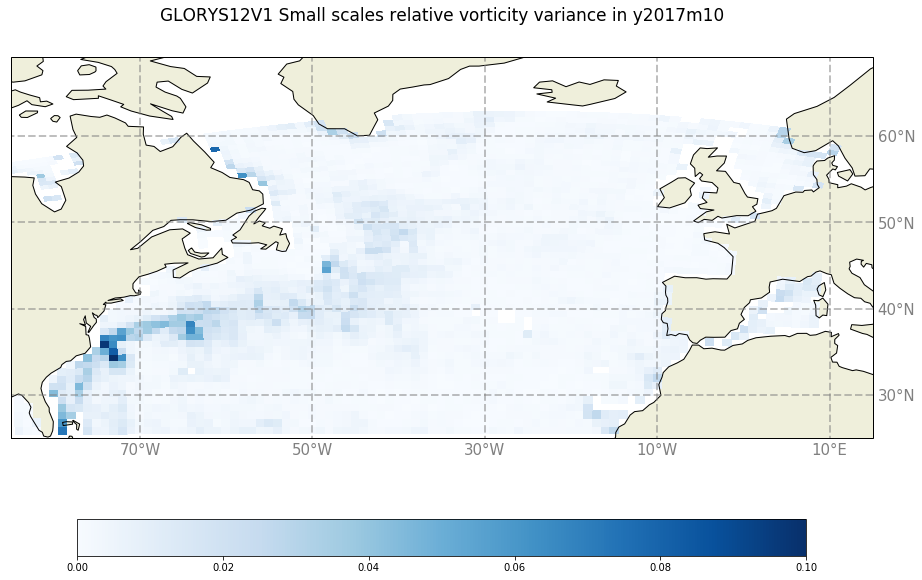

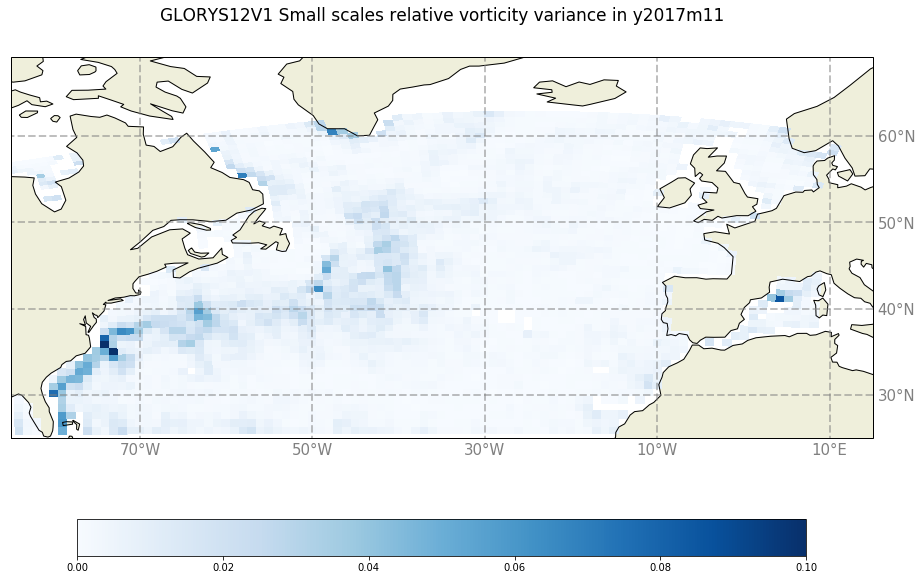

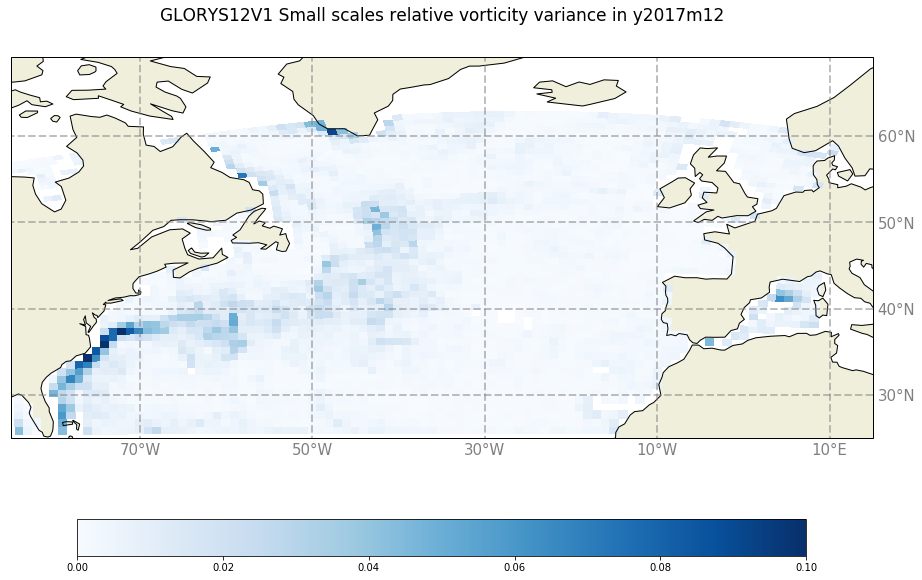

In [63]:
for m in np.arange(1,13):
    plot_var(m)

In [ ]:
convert -delay 120 -loop 0 plots/GLORYS12V1_plots_small_scale_vorticity_variance_y2017m*.png plots/GLORYS12V1_plots_small_scale_vorticity_variance_y2017.gif